In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_labels.csv')

In [3]:
df_2 = pd.read_csv('train_expression.csv')

In [4]:
df['age']

0      55
1      62
2      52
3      42
4      63
       ..
960    64
961    54
962    54
963    24
964    44
Name: age, Length: 965, dtype: int64

In [5]:
df_3 = pd.read_csv('train_feature_names.csv')

In [12]:
df_3

,gene_id,symbol
0,ENSG00000000003.14,TSPAN6
1,ENSG00000000005.5,TNMD
2,ENSG00000000419.12,DPM1
3,ENSG00000000457.13,SCYL3
4,ENSG00000000460.16,C1orf112
...,...,...
52930,ENSG00000283695.1,NaN
52931,ENSG00000283696.1,NaN
52932,ENSG00000283697.1,HSFX3
52933,ENSG00000283698.1,NaN


In [6]:
features = df_2
labels = df['age']

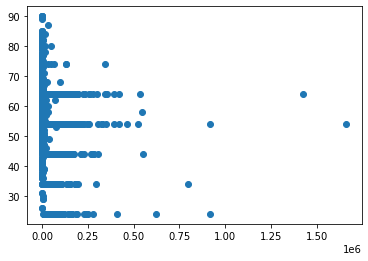

In [13]:
plt.plot(df_2['ENSG00000000005.5'], df['age'], 'o')

## PCA

In [14]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

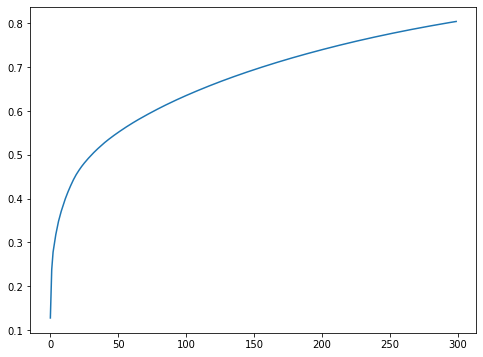

In [33]:
scaled_frame = StandardScaler().fit_transform(features.values)
pc1 = PCA(n_components=300)
pc1.fit(scaled_frame)

plt.plot(np.cumsum(pc1.explained_variance_ratio_))
plt.show()

In [34]:
principalComponents = pc1.fit_transform(scaled_frame)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [np.arange(0,300)])

In [35]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,82.338075,-73.611379,3.906973,33.819354,-59.354301,10.714485,-10.008898,-12.371845,-12.643462,-5.358708,...,-5.359748,0.353290,-1.929619,-2.083834,0.564526,-0.168729,1.693076,-1.128616,2.221298,0.911180
1,-80.037709,-59.489853,4.667732,3.106723,-9.462458,-3.049594,-6.432534,6.352022,22.752971,11.662656,...,19.684380,19.619637,2.812831,20.423266,-26.227645,13.520661,-24.420083,-5.830231,-25.687996,-10.006315
2,8.019354,-73.784219,-1.418993,18.331087,-11.174846,-8.784098,-22.167719,15.057054,16.430602,1.913122,...,0.134007,-5.881490,1.889430,-2.766399,-0.446235,-1.893521,2.970106,-3.396570,1.901833,2.269406
3,-44.712661,-64.291802,-3.171556,9.458681,-12.060785,-9.137764,-12.411651,13.648088,20.055473,1.731157,...,-0.151662,-1.324503,0.051812,-0.377841,-0.354902,-0.255213,1.146378,-0.104843,1.264373,0.713166
4,-79.718590,-63.798879,-2.096706,-3.378497,-4.321059,-7.948347,-5.033225,14.805149,26.897691,2.094620,...,0.167028,-1.585920,-0.521415,1.379437,0.697810,0.012859,0.723052,0.290565,-0.403811,0.040360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-77.169521,12.232554,-3.341187,-24.527092,9.516145,5.074522,-5.616899,-2.246240,-3.505061,-1.370361,...,1.239742,1.649279,-0.303758,-0.611951,1.417519,-1.923835,0.983783,-0.529663,-1.211192,1.129476
961,-47.469077,35.129839,2.032567,23.816386,5.127484,-12.737335,0.392818,27.018781,-30.507060,1.977007,...,-1.438062,0.377106,0.560463,-1.751437,-1.973689,0.868432,-0.392356,3.717804,-2.593810,1.809789
962,-64.664697,20.831303,-5.207723,5.324640,-0.854015,-9.822544,4.231098,20.382853,-8.749984,6.452395,...,1.806956,0.276549,0.746862,0.492849,4.013242,0.965943,-0.475948,-1.561320,-2.405458,2.324061
963,-71.870654,14.319836,-3.427867,-21.076400,1.207770,1.721152,-0.624263,-5.424939,3.125115,-6.629747,...,-1.249995,-1.247170,-0.825729,0.820561,1.185411,-0.268257,2.993283,2.388837,-0.084309,-0.522818


## Check for any high correlation

In [36]:
# c_mat = principalDf.iloc[:,:-1].corr().abs()
# corr_thresh = 0.75
# for i in range(c_mat.shape[0]):
#     for j in range(i+1, c_mat.shape[1]):
#         if c_mat.iloc[i,j] > corr_thresh:
#             print(f'Thresh reached for ({c_mat.index[i]}, {c_mat.columns[j]})')

## Some different models

In [37]:
### Should we try a combination of clustering based on groups(A,B,C...) and regression?

In [38]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

In [39]:
X_train = principalDf 
y_train = labels

### Linear Regression

In [40]:
### Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=['neg_mean_squared_error'])['test_neg_mean_squared_error']
print(np.mean(scores))

-7348.226389817379


### Lasso 

In [41]:
### Grid Search for Lasso
from sklearn.linear_model import Lasso
parameters = {'alpha': np.arange(0.01, 0.9, 0.01)}
clf = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)
clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]

/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16481.66966545859, tolerance: 13.037395336787563
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10590.715562761452, tolerance: 13.118487435233154
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16912.966550026606, tolerance: 14.345858419689115
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coo

/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.889674524907605, tolerance: 13.848785880829007
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.2958703702534, tolerance: 13.037395336787563
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.560458119551186, tolerance: 13.118487435233154
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coor

/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.927906573968357, tolerance: 14.345858419689115
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.39230433243938, tolerance: 14.345858419689115
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.446195345743035, tolerance: 14.345858419689115
  model = cd_fast.enet_coordinate_descent(
/software/python3/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_coo

{'alpha': 0.89}

In [42]:
# from sklearn.linear_model import Lasso
clf = Lasso(alpha =0.89 )
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=['neg_mean_squared_error'])['test_neg_mean_squared_error']
np.mean(scores)

-170.2752019405531

In [43]:
# 300:171, 450: 177, 800: 166

### SVR

In [44]:
from sklearn.svm import SVR
parameters = {'C':np.arange(5,10,1), 'epsilon':np.arange(0.01,0.1,0.02)}
clf = GridSearchCV(SVR(), parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)
clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]

{'C': 9, 'epsilon': 0.08999999999999998}

In [45]:
from sklearn.svm import SVR
clf = SVR(C= 9, epsilon = 0.01)
scores = cross_validate(clf, X_train, y_train, cv=5, scoring=['neg_mean_squared_error'])['test_neg_mean_squared_error']
np.mean(scores)

-153.30419352522338

In [46]:
# 450: 152.9

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [50]:
# New random forest with only the two most important variables
model = base_model 
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
np.mean(scores.get('test_score'))

-148.22067046632122

In [24]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120,130],
    'max_features': [1,2, 3],
    'min_samples_leaf': [1,2,3, 4, 5],
    'min_samples_split': [5,6,7, 8],
    'n_estimators': [50, 100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.2min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [27]:
model = grid_search.best_estimator_
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
np.mean(scores.get('test_score'))

-169.48566364005805

In [ ]:
300: -145.82, 450: 150

## Factor Analysis

In [57]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=300, random_state=0)
X_transformed = transformer.fit_transform(features)
X_transformed.shape

(965, 300)

In [58]:
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model = base_model 
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_validate(model, X_transformed, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
np.mean(scores.get('test_score'))

-146.0891317098446

In [67]:
df = pd.read_csv(r'~/Hackathon-Summer-2021/test_data/test_expression.csv.gz')

In [68]:
df

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
0,216130,3724,158501,169431,72136,239413,1958773,405054,190105,111787,...,1,160,0,151,23,2,2382,11417,1,1
1,196089,671,96434,112703,67922,15916,209234,105360,192348,110960,...,0,186,0,1,0,0,1895,10016,48,0
2,455669,123617,217274,174936,88070,382592,817841,396940,397913,198589,...,0,71,1,0,0,1,2710,9278,1,0
3,92006,400,271295,444488,242673,50198,359611,310289,783368,753853,...,1,544,1,1,59,52,6067,27156,28,1
4,311516,108041,143606,134343,70622,261239,1046396,238826,187343,172348,...,0,238,152,0,0,52,5699,5548,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,296204,79196,136213,108992,51934,151602,1306539,282481,296760,99096,...,0,34,0,0,0,0,1814,2127,88,8
961,132013,300,180121,228193,125795,75226,558261,1906351,335050,248454,...,1,178,2,0,50,1,8154,8047,47,0
962,310207,124793,118259,91054,43694,142288,504706,315608,275643,84314,...,0,235,1,0,0,1,1355,4441,1,0
963,471442,35793,405090,663404,664431,65907,172527,513408,326845,1133083,...,0,711,2,0,19,1,6726,10172,50,0


In [69]:
test_features = df

In [70]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=300, random_state=0)
X_test = transformer.fit_transform(test_features)
X_test.shape

(965, 300)

In [71]:
base_model.fit(X_transformed, y_train)
base_model.predict(X_test)

array([55.09, 54.92, 51.28, 51.13, 54.68, 46.41, 56.89, 51.1 , 57.55,
       50.53, 59.01, 56.82, 55.72, 62.96, 59.81, 57.33, 54.26, 51.61,
       50.9 , 49.42, 43.77, 52.25, 53.64, 52.96, 45.59, 48.29, 56.77,
       50.39, 57.95, 56.34, 54.04, 49.84, 53.38, 52.03, 58.88, 53.88,
       48.5 , 58.18, 57.31, 49.3 , 50.08, 48.21, 53.13, 54.8 , 49.81,
       57.82, 45.5 , 54.41, 52.49, 58.97, 53.96, 56.09, 55.42, 53.85,
       47.91, 55.91, 55.51, 50.24, 57.51, 45.86, 58.93, 56.1 , 53.91,
       45.2 , 48.48, 56.75, 56.3 , 56.8 , 57.26, 56.49, 49.86, 56.39,
       55.7 , 58.1 , 55.76, 51.4 , 50.99, 53.85, 50.99, 55.29, 43.84,
       46.15, 52.31, 59.97, 53.71, 58.43, 53.13, 47.59, 55.2 , 52.74,
       53.92, 55.45, 50.44, 48.05, 52.16, 43.54, 57.28, 49.44, 49.51,
       57.07, 50.84, 54.43, 45.74, 56.38, 52.88, 56.06, 53.83, 52.35,
       62.04, 56.79, 50.71, 56.83, 53.87, 55.31, 56.79, 54.63, 57.64,
       52.45, 55.22, 54.34, 55.46, 54.02, 58.01, 52.77, 51.37, 55.57,
       58.91, 44.17,

In [72]:
df = pd.DataFrame(base_model.predict(X_test))
df.to_csv('pred_1.csv')

In [59]:
from sklearn.svm import SVR
parameters = {'C':np.arange(5,10,1), 'epsilon':np.arange(0.01,0.1,0.02)}
clf = GridSearchCV(SVR(), parameters, scoring='neg_mean_squared_error')
clf.fit(X_transformed, y_train)
clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])]

{'C': 9, 'epsilon': 0.01}

In [60]:
from sklearn.svm import SVR
clf = SVR(C= 9, epsilon = 0.01)
scores = cross_validate(clf, X_transformed, y_train, cv=5, scoring=['neg_mean_squared_error'])['test_neg_mean_squared_error']
np.mean(scores)

-160.55727928161784

### XGBoost

In [ ]:
'Lewis/Brosnted  acid Sites'

### GPR

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [ ]:
# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha= 0.000005)

In [ ]:
# New random forest with only the two most important variables
model = gpr 
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
np.mean(scores.get('test_score'))

In [21]:
# import numpy as np
# # Labels are the values we want to predict
# labels = np.array(labels)
# # Remove the labels from the features
# # Saving feature names for later use
# feature_list = list(features.columns)
# # Convert to numpy array
# features = np.array(features)

In [24]:
# # Random forest
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [18]:
from numpy import mean
import sklearn
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [21]:
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, features, labels, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 450.895 (329.351)


In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (772, 52935)
Training Labels Shape: (772,)
Testing Features Shape: (193, 52935)
Testing Labels Shape: (193,)


In [26]:
# The baseline predictions are the historical averages
baseline_preds = np.mean(labels)
# Baseline errors, and display average baseline error
baseline_errors = (baseline_preds - test_labels)**2
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  164.46


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);